In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, text, inspect, func, desc


In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")


In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the Base
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# printing the column names and types
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column['name'], column['type'])

station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create a session
session = Session(engine)
conn = engine.connect()


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(desc(Measurement.date)).limit(1).all()
print(last_date)

[('2017-08-23',)]


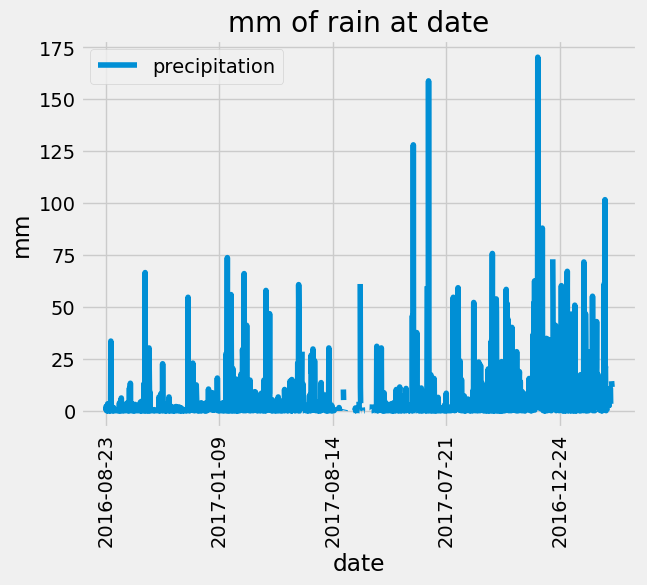

In [11]:
#year_data = session.query(Measurement.date, Measurement.prcp).order_by(desc(Measurement.date)).limit(365).all()
rain_query = text('SELECT date, prcp FROM measurement WHERE date between "2016-08-23" and "2017-08-23"')
year_data = pd.read_sql(rain_query, conn)
year_data_df = pd.DataFrame(year_data)



rainfall_plot = year_data_df.plot(x='date', y='prcp', label='precipitation', kind='line', title='mm of rain at date')
plt.ylabel('mm')
plt.xticks(rotation=90)


plt.show()

Text(0, 0.5, 'mm')

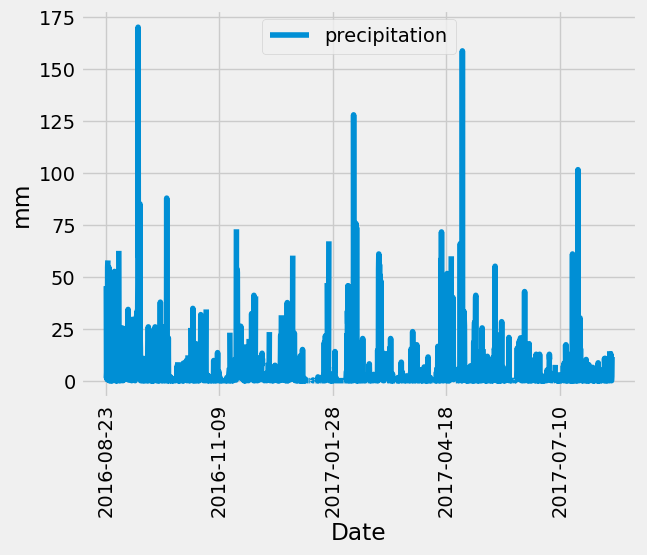

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [28]:
# Use Pandas to calculate the summary statistics for the precipitation data
def Q1(x):     # Creating a function to find and return the quantiles
    return x.quantile(0.25)

def Q2(x):
    return x.quantile(0.5)

def Q3(x):
    return x.quantile(0.75)

precipitation_summary = year_data_df.agg({'prcp': ['count', 'mean', 'std', 'min', Q1, Q2, Q3, 'max']})
precipitation_summary

,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
Q1,0.000000
Q2,0.500000
Q3,3.300000
max,170.200000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
total_stations

9

In [46]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station))).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_summary = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
active_station_summary

[(12.2, 29.4, 22.035822510822513)]

Text(0.5, 4.183333333333314, 'Temperature')

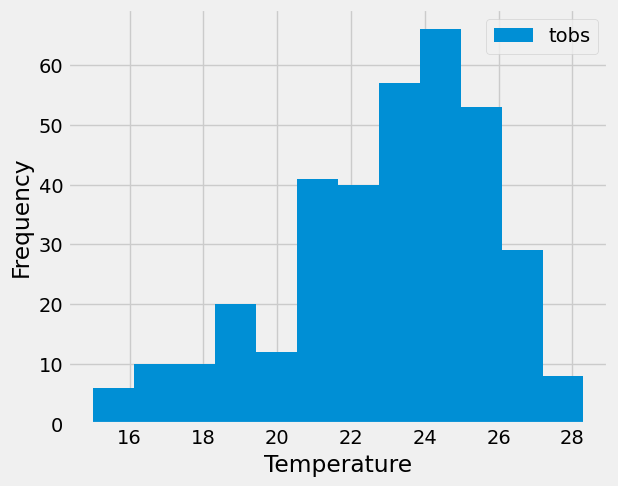

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()
